# Week-1

**Note to Learners**: 

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

2023-06-08 18:26:18.075451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


11490434/11490434 [==============================] - 3s 0us/step


## Problem-1

How many samples does the dataset have?

In [2]:
# Enter your solution here
X.shape[0]

100

## Problem-2

How many features does the dataset have?

In [3]:
# Enter your solution here
X.shape[1]

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library. 

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

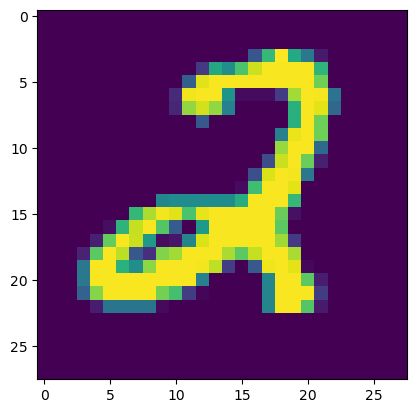

In [4]:
# Enter your solution here
import matplotlib.pyplot as plt

plt.imshow(X[32].reshape((28,28)))

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [5]:
# Enter your solution 
X_mean = X - X.mean(0)

np.sqrt(np.sum(X_mean ** 2)) / (X.shape[0] * X.shape[1])

0.23242174456564685

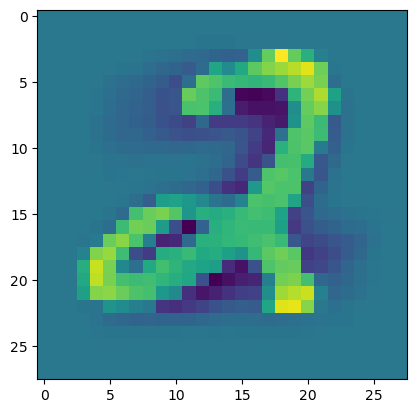

In [6]:
plt.imshow(X_mean[32].reshape((28,28)))

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [7]:
# Enter your solution here
C = (X_mean.T@X_mean)/100

np.sqrt(np.sum(C ** 2))/(C.shape[0] ** 2)

1.3648061009232249

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [8]:
# Enter your solution here
w, v = np.linalg.eigh(C)

np.sum(v[:, -1] + v[:, -2])

1.051624388059818

## Problem-7

Visualize the first principal component as an image.

In [12]:
v[:, -1].shape

(784,)

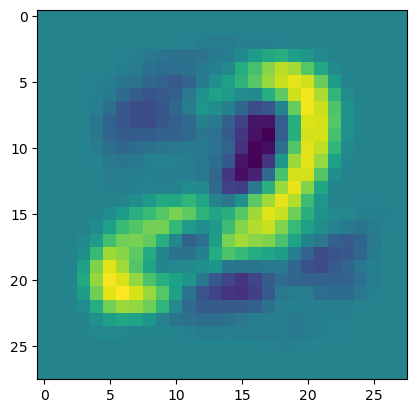

In [9]:
# Enter your solution here
plt.imshow(v[:,-1].reshape((28,28)))

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [10]:
# Enter your solution here

k = w.shape[0] - 1
total = np.sum(w)
cur = np.sum(w[k:])
ks = []

for i in [0.20, 0.50, 0.8, 0.95]:
  while cur/total < i:
    k -= 1
    cur = np.sum(w[k:])
  ks.append(k)
  

ks

[782, 778, 762, 731]

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



<Figure size 640x480 with 0 Axes>

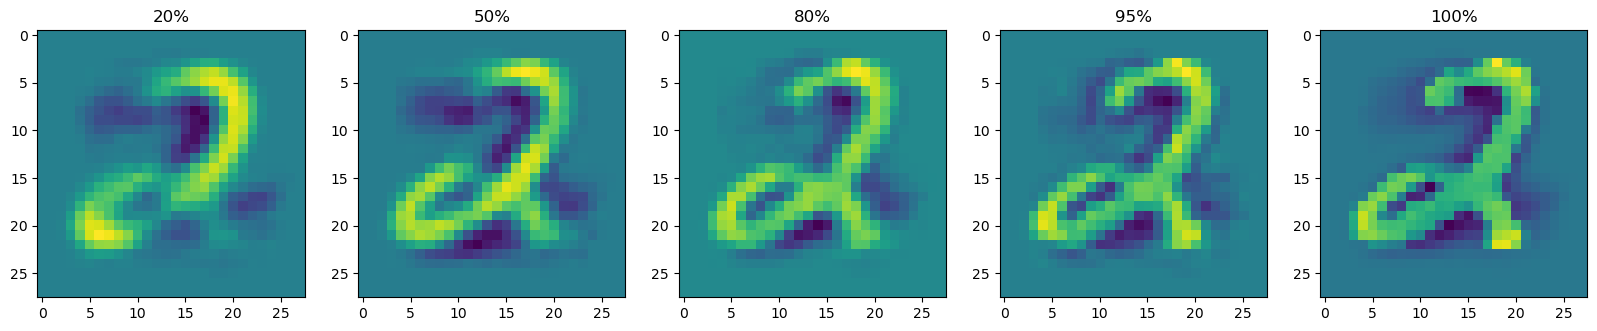

In [11]:
# Enter your solution here
plt.figure()

f, axes = plt.subplots(1,5, figsize = (20,100))
i = 0
titles = ["20%", "50%", "80%", "95%", "100%"]

for k in ks:
  required = v[:, k:].T
  x = 0

  for vi in required:
    x += (X_mean[32].reshape((1,-1))@vi.reshape((-1,1)))*vi

  axes[i].imshow(x.reshape((28,28)))
  axes[i].set_title(titles[i])
  i += 1

axes[i].imshow(X_mean[32].reshape((28,28)))
axes[i].set_title(titles[i])

plt.show()